# Regression Model using Heart Indicator Dataset

### Pakage Importing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import time

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)
%config InlineBackend.figure_format = 'retina'

In [4]:
pd.set_option("display.float", "{:.2f}".format)
pd.set_option("display.max_columns", None)
warnings.filterwarnings(action='ignore')

### Loading and Analyzing the dataset

In [5]:
# Loading the dataset

df = pd.read_csv('heart_disease_health_indicators_BRFSS2015.csv')

In [6]:
# Observing the data

df

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.00,1.00,1.00,1.00,40.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,5.00,18.00,15.00,1.00,0.00,9.00,4.00,3.00
1,0.00,0.00,0.00,0.00,25.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,3.00,0.00,0.00,0.00,0.00,7.00,6.00,1.00
2,0.00,1.00,1.00,1.00,28.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,1.00,5.00,30.00,30.00,1.00,0.00,9.00,4.00,8.00
3,0.00,1.00,0.00,1.00,27.00,0.00,0.00,0.00,1.00,1.00,1.00,0.00,1.00,0.00,2.00,0.00,0.00,0.00,0.00,11.00,3.00,6.00
4,0.00,1.00,1.00,1.00,24.00,0.00,0.00,0.00,1.00,1.00,1.00,0.00,1.00,0.00,2.00,3.00,0.00,0.00,0.00,11.00,5.00,4.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.00,1.00,1.00,1.00,45.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,1.00,0.00,3.00,0.00,5.00,0.00,1.00,5.00,6.00,7.00
253676,0.00,1.00,1.00,1.00,18.00,0.00,0.00,2.00,0.00,0.00,0.00,0.00,1.00,0.00,4.00,0.00,0.00,1.00,0.00,11.00,2.00,4.00
253677,0.00,0.00,0.00,1.00,28.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,2.00,5.00,2.00
253678,0.00,1.00,0.00,1.00,23.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,1.00,0.00,3.00,0.00,0.00,0.00,1.00,7.00,5.00,1.00


In [7]:
# Finding more infomraiton about the data

df.shape

(253680, 22)

In [8]:
# Print a concise summary of a DataFrame

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   HeartDiseaseorAttack  253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   Diabetes              253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [9]:
# Mathamatical understanding of the dataset

df.describe()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.00,253680.00,253680.00,253680.00,253680.00,253680.00,253680.00,253680.00,253680.00,253680.00,253680.00,253680.00,253680.00,253680.00,253680.00,253680.00,253680.00,253680.00,253680.00,253680.00,253680.00,253680.00
mean,0.09,0.43,0.42,0.96,28.38,0.44,0.04,0.30,0.76,0.63,0.81,0.06,0.95,0.08,2.51,3.18,4.24,0.17,0.44,8.03,5.05,6.05
std,0.29,0.49,0.49,0.19,6.61,0.50,0.20,0.70,0.43,0.48,0.39,0.23,0.22,0.28,1.07,7.41,8.72,0.37,0.50,3.05,0.99,2.07
min,0.00,0.00,0.00,0.00,12.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00
25%,0.00,0.00,0.00,1.00,24.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,2.00,0.00,0.00,0.00,0.00,6.00,4.00,5.00
50%,0.00,0.00,0.00,1.00,27.00,0.00,0.00,0.00,1.00,1.00,1.00,0.00,1.00,0.00,2.00,0.00,0.00,0.00,0.00,8.00,5.00,7.00
75%,0.00,1.00,1.00,1.00,31.00,1.00,0.00,0.00,1.00,1.00,1.00,0.00,1.00,0.00,3.00,2.00,3.00,0.00,1.00,10.00,6.00,8.00
max,1.00,1.00,1.00,1.00,98.00,1.00,1.00,2.00,1.00,1.00,1.00,1.00,1.00,1.00,5.00,30.00,30.00,1.00,1.00,13.00,6.00,8.00


In [10]:
# Display the top 5 entities of the dataset

df.head()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.00,1.00,1.00,1.00,40.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,5.00,18.00,15.00,1.00,0.00,9.00,4.00,3.00
1,0.00,0.00,0.00,0.00,25.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,3.00,0.00,0.00,0.00,0.00,7.00,6.00,1.00
2,0.00,1.00,1.00,1.00,28.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,1.00,5.00,30.00,30.00,1.00,0.00,9.00,4.00,8.00
3,0.00,1.00,0.00,1.00,27.00,0.00,0.00,0.00,1.00,1.00,1.00,0.00,1.00,0.00,2.00,0.00,0.00,0.00,0.00,11.00,3.00,6.00
4,0.00,1.00,1.00,1.00,24.00,0.00,0.00,0.00,1.00,1.00,1.00,0.00,1.00,0.00,2.00,3.00,0.00,0.00,0.00,11.00,5.00,4.00


In [11]:
# Display the bottom 5 entities of the dataset

df.tail()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
253675,0.00,1.00,1.00,1.00,45.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,1.00,0.00,3.00,0.00,5.00,0.00,1.00,5.00,6.00,7.00
253676,0.00,1.00,1.00,1.00,18.00,0.00,0.00,2.00,0.00,0.00,0.00,0.00,1.00,0.00,4.00,0.00,0.00,1.00,0.00,11.00,2.00,4.00
253677,0.00,0.00,0.00,1.00,28.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,2.00,5.00,2.00
253678,0.00,1.00,0.00,1.00,23.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,1.00,0.00,3.00,0.00,0.00,0.00,1.00,7.00,5.00,1.00
253679,1.00,1.00,1.00,1.00,25.00,0.00,0.00,2.00,1.00,1.00,0.00,0.00,1.00,0.00,2.00,0.00,0.00,0.00,0.00,9.00,6.00,2.00


In [12]:
# More info about the data

df.dtypes

HeartDiseaseorAttack    float64
HighBP                  float64
HighChol                float64
CholCheck               float64
BMI                     float64
Smoker                  float64
Stroke                  float64
Diabetes                float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump       float64
AnyHealthcare           float64
NoDocbcCost             float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Sex                     float64
Age                     float64
Education               float64
Income                  float64
dtype: object

### Finding any missing values from the dataset

In [13]:
pd.DataFrame({
    'Data type':df.dtypes,
    'Number of unique values':df.nunique(),
    '% of missing values':df.isna().sum()/len(df)
})

,Data type,Number of unique values,% of missing values
HeartDiseaseorAttack,float64,2,0.00
HighBP,float64,2,0.00
HighChol,float64,2,0.00
CholCheck,float64,2,0.00
BMI,float64,84,0.00
Smoker,float64,2,0.00
Stroke,float64,2,0.00
Diabetes,float64,3,0.00
PhysActivity,float64,2,0.00
Fruits,float64,2,0.00


### Finding the unique entities in the dataset

In [14]:
target = ['HeartDiseaseorAttack']

num_cols = [col for col in df.columns if df[col].nunique() > 10]
num_cols = num_cols + ['Income']

cat_cols = [col for col in df.columns if col not in target + num_cols]

print(num_cols)
print(cat_cols)

['BMI', 'MentHlth', 'PhysHlth', 'Age', 'Income']
['HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 'Diabetes', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'DiffWalk', 'Sex', 'Education']


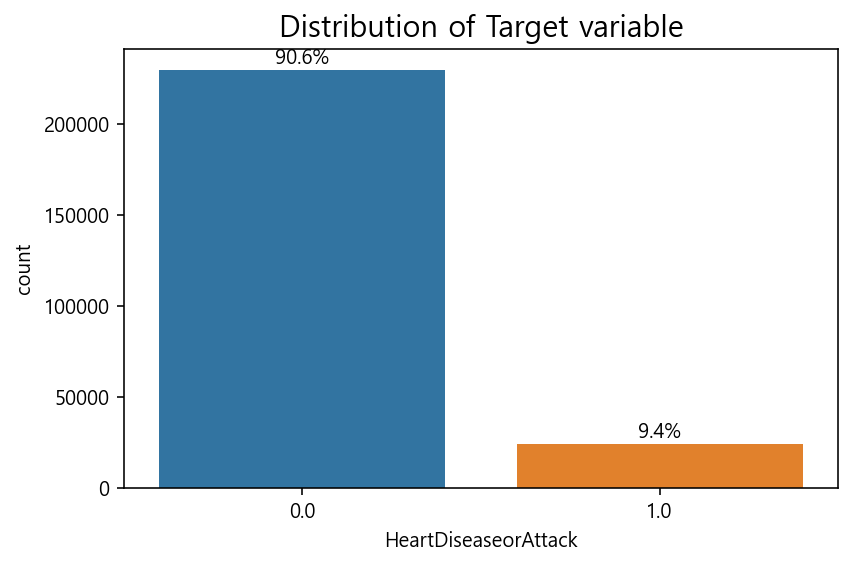

In [15]:
ax = sns.countplot(df['HeartDiseaseorAttack'])
_ = plt.title('Distribution of Target variable', fontdict={'fontsize':15})

total = len(df)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    _ = ax.annotate(percentage, (x, y), ha='center', va='center')
plt.tight_layout()
plt.show()

#### Predictor Distribution

In [16]:
len(cat_cols)

16

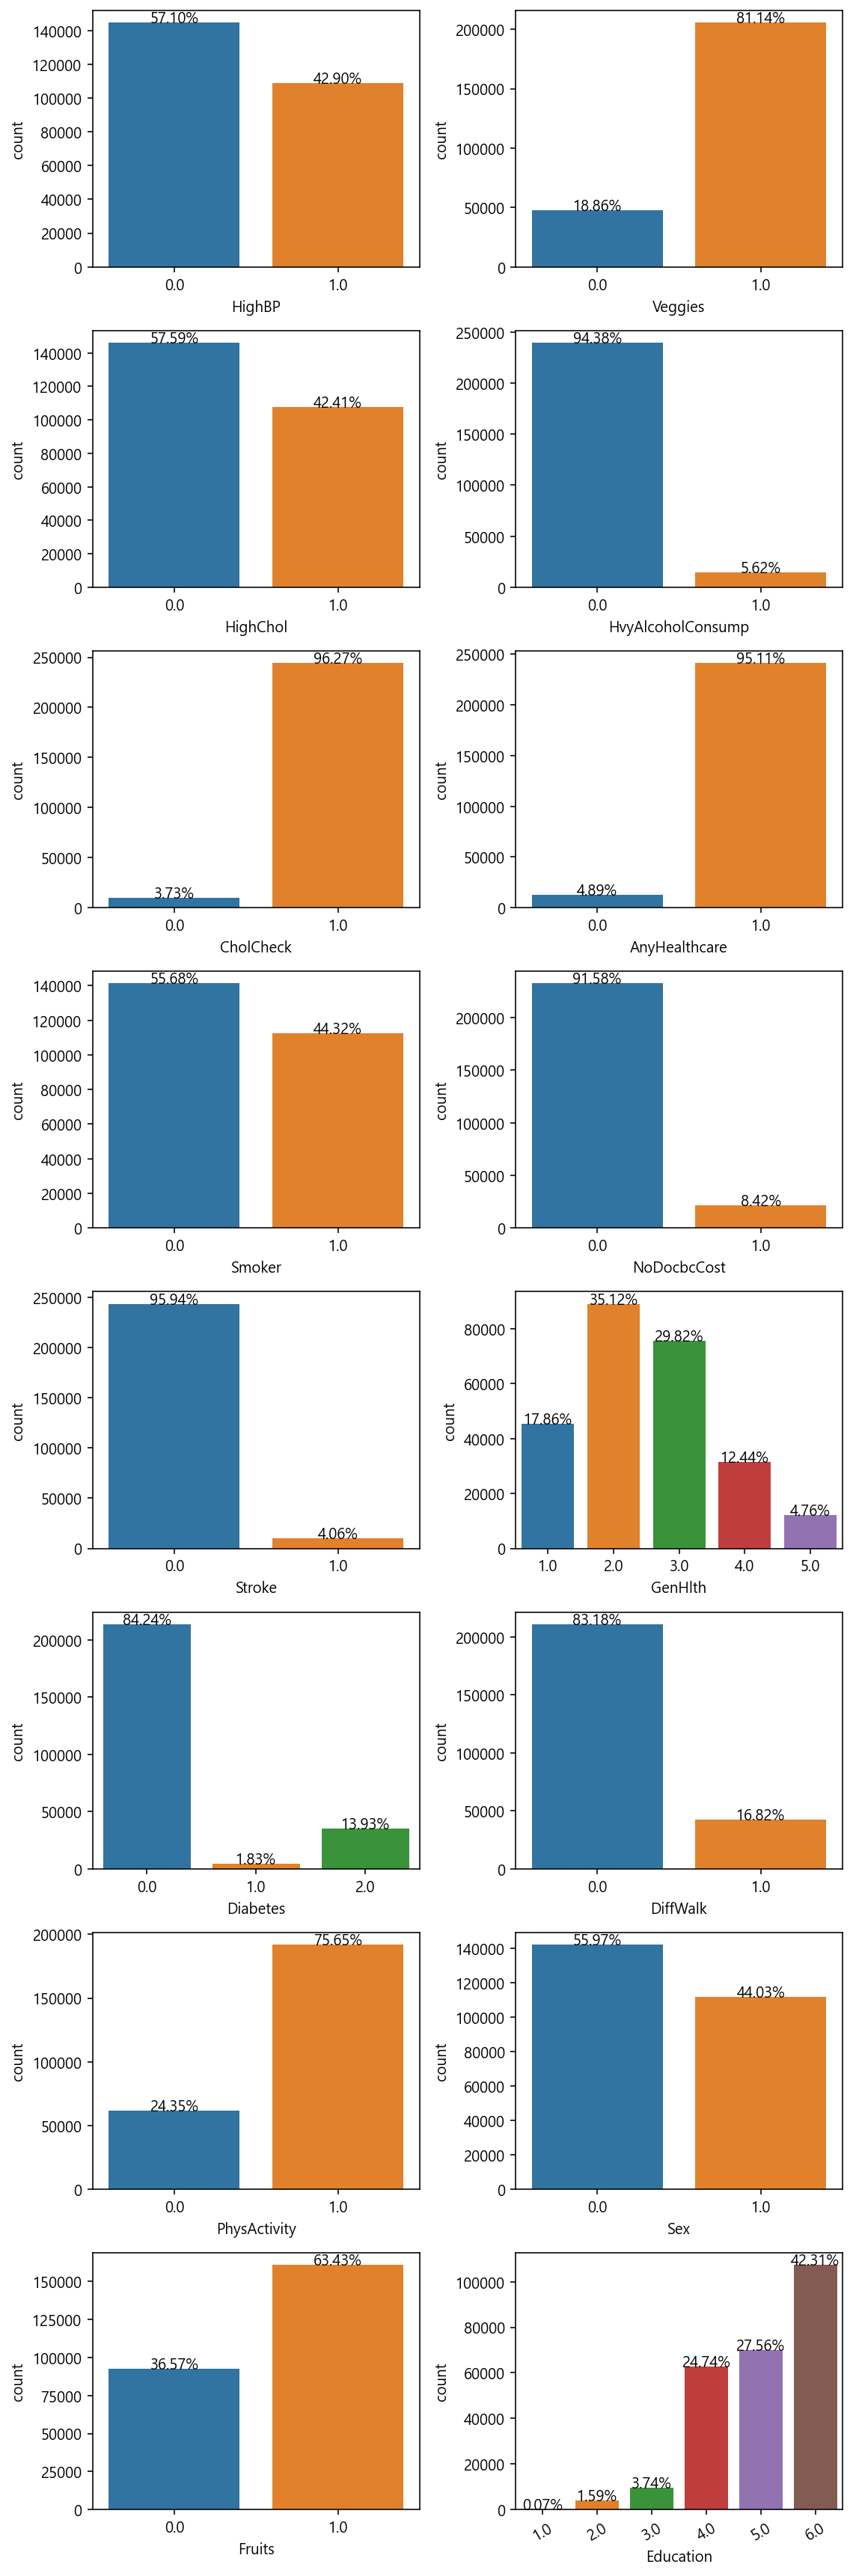

In [17]:
fig, axes = plt.subplots(8, 2, figsize = (8, 3*8))

for ind, col in enumerate(cat_cols):
    _ = sns.countplot(x=col, data=df, ax=axes[np.where(ind < 8, ind, ind-8), np.where(ind < 8, 0, 1)])
    _ = plt.xticks(rotation=30)
    
    for p in axes[np.where(ind<8, ind, ind-8), np.where(ind<8, 0, 1)].patches:
        total = len(df[col])
        percentage = '{:.2f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width()/2
        y = p.get_height()
        _ = axes[np.where(ind<8, ind, ind-8), np.where(ind<8, 0, 1)].annotate(percentage, (x, y),ha='center')    
    
fig.tight_layout()

In [18]:
len(num_cols)

5

#### Additional Information about the target Attribute

In [19]:
from sklearn.preprocessing import PowerTransformer

log = PowerTransformer()
log.fit(df[['BMI']])

df['BMI'] = log.transform(df[['BMI']])

PowerTransformer()

<AxesSubplot:xlabel='BMI', ylabel='Count'>

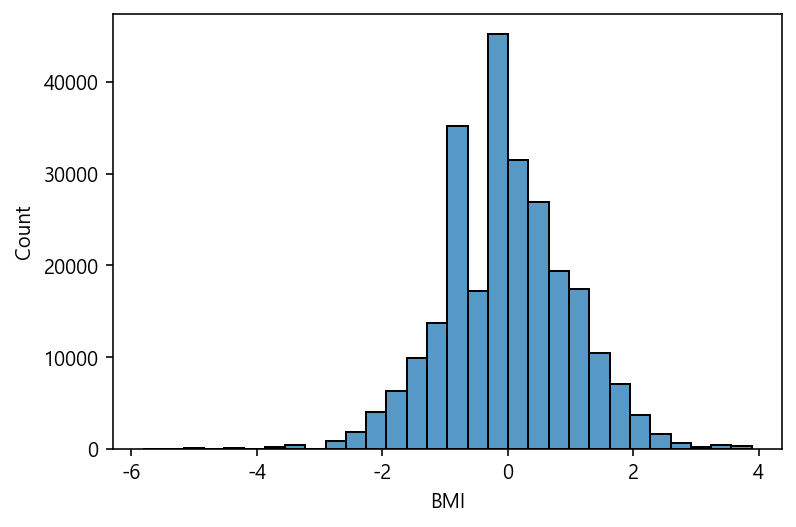

In [20]:
sns.histplot(x='BMI', data=df, bins=30)

### Corrlation Matrix

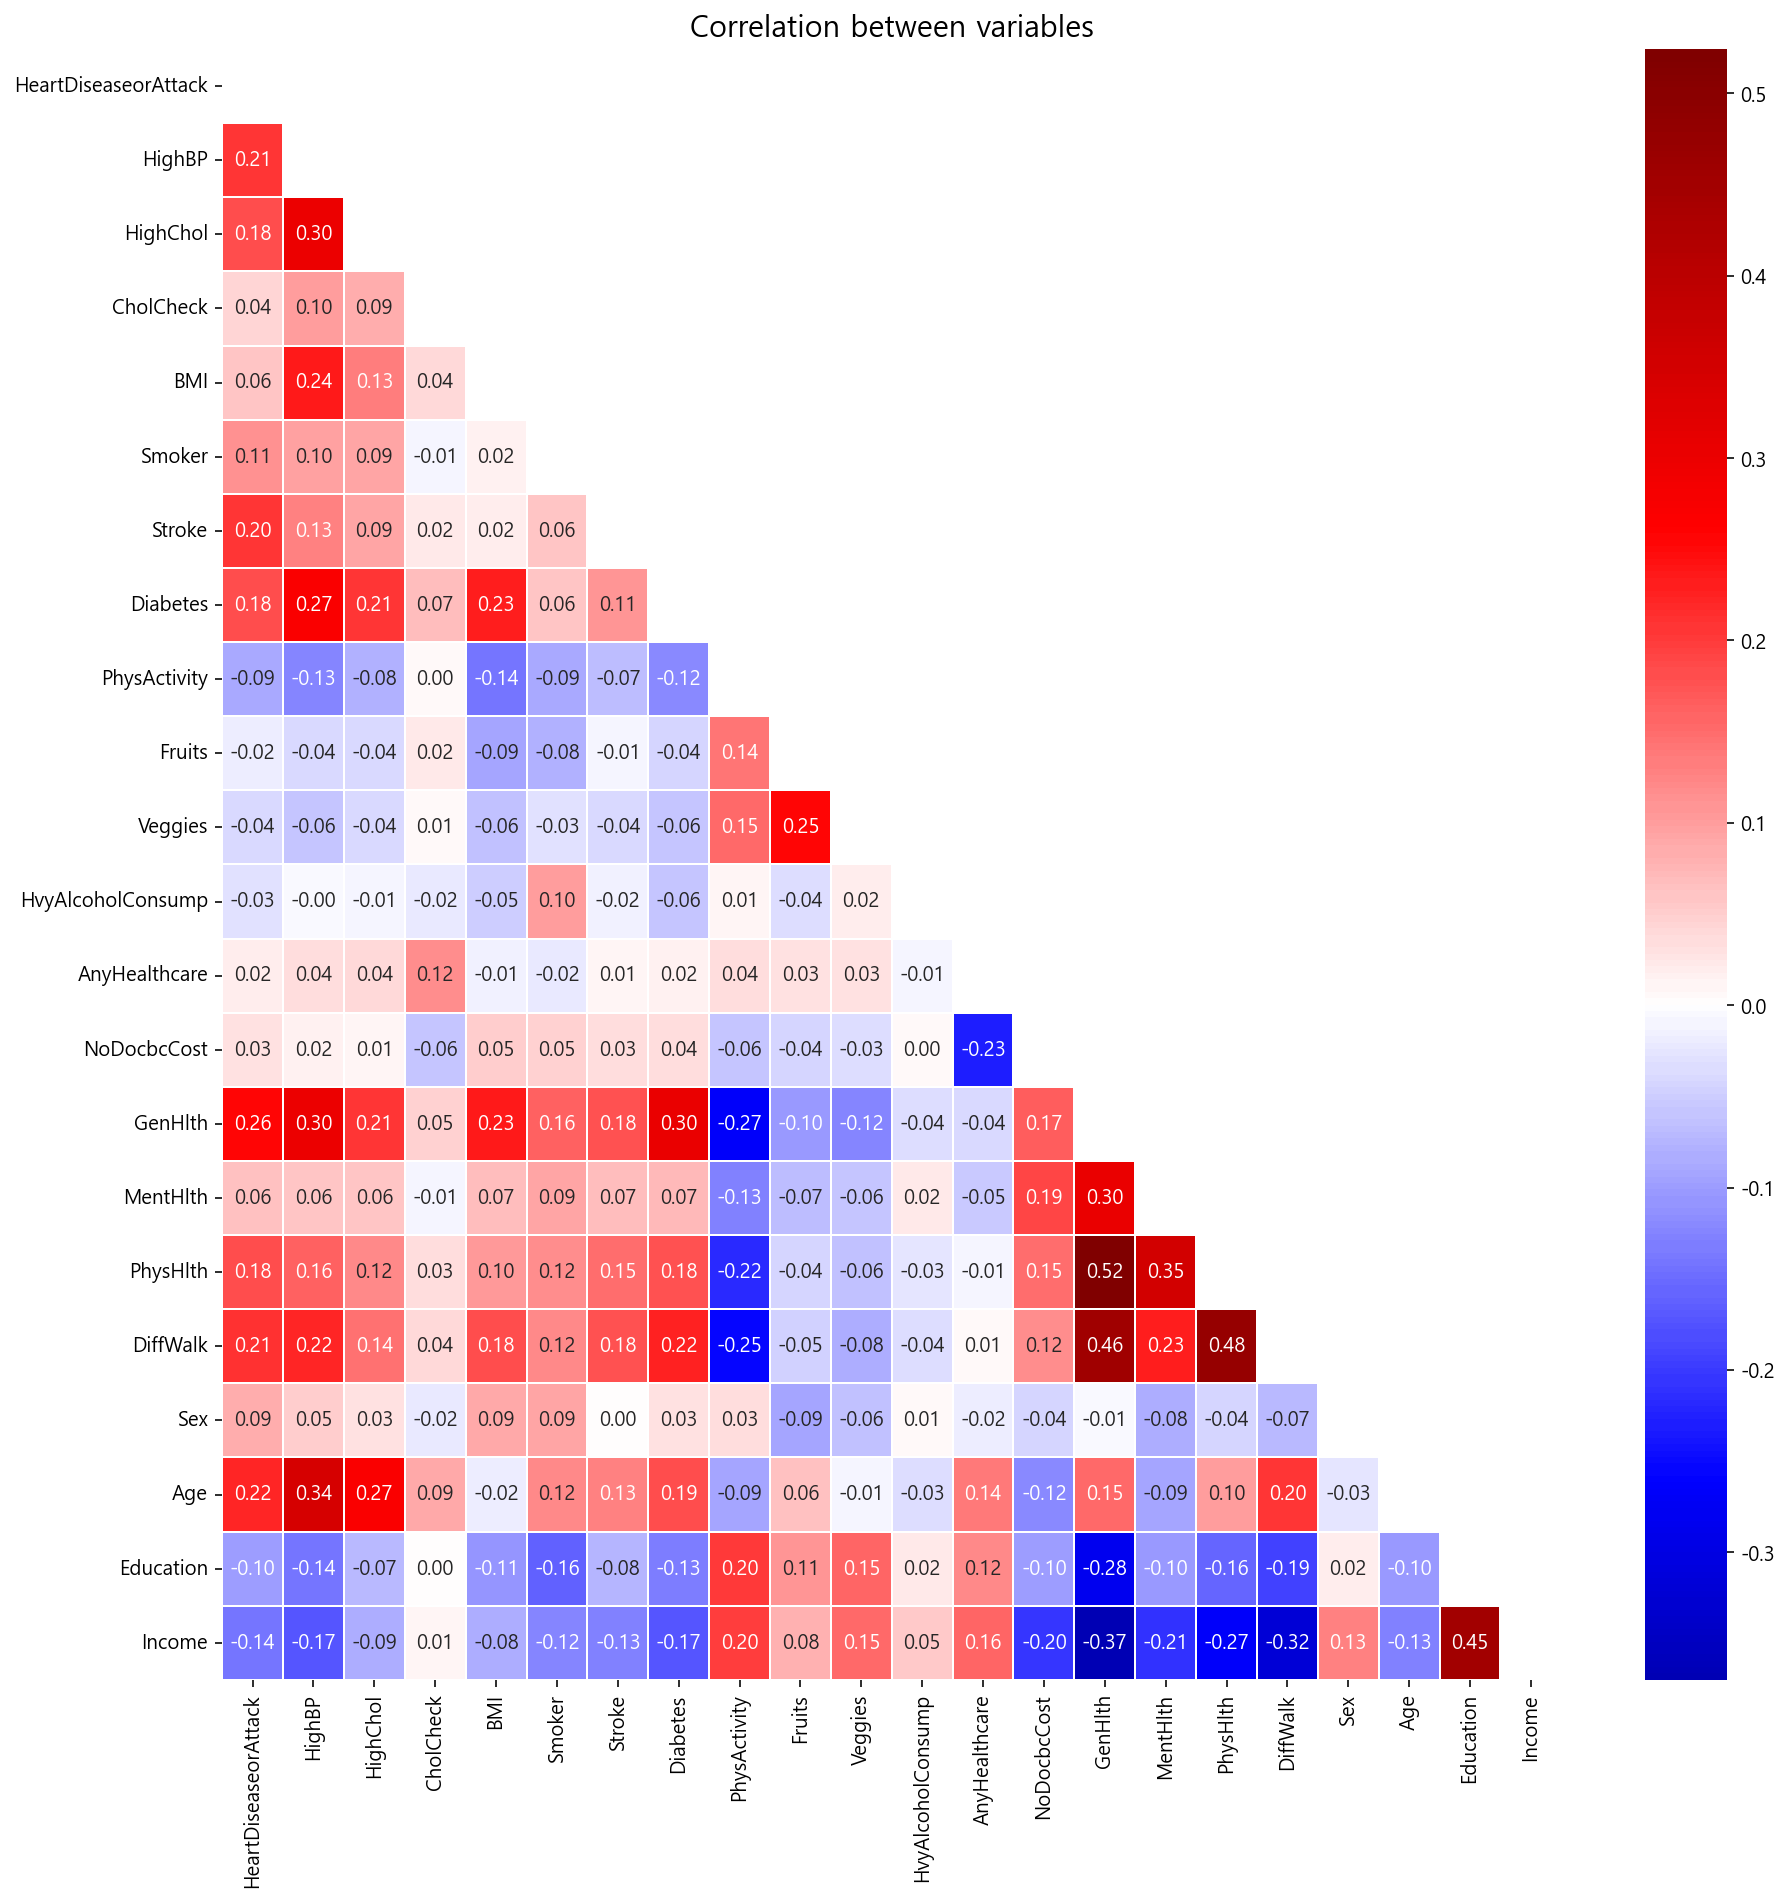

In [21]:
corr = df.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))
_ = plt.figure(figsize = (15, 15))
_ = sns.heatmap(corr,
           mask = mask,
           annot = True,
           cmap = "seismic",
           center = 0,
           fmt = '.2f',
           linewidths=1)
_ = plt.title('Correlation between variables', fontdict={'fontsize':15})

## Modeling

### Data Splitting and Training

In [22]:
from sklearn.model_selection import train_test_split

X = df.drop(target[0], axis=1)
y = df[target[0]]

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.4, stratify=y, random_state=802)

In [23]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(train_X)
train_X_std = scaler.transform(train_X)
test_X_std = scaler.transform(test_X)

In [24]:
# Over sampling

from imblearn.over_sampling import SMOTE

smote = SMOTE()
train_X_re, train_y_re = smote.fit_resample(train_X_std, train_y)

### Data Evaluation Metrics

In [25]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, average_precision_score, f1_score
from sklearn.metrics import mean_squared_error

def print_score(actual, pred, prob, split):
    print(f"\n{split} set modeling Result:")
    print("================================================")
    print(confusion_matrix(actual, pred))
    print(f"\nAccuracy Score: {round(accuracy_score(actual, pred), 5)*100}%")
    
    print(f"AU Precision-Recall curve Score: {round(average_precision_score(actual, prob), 5)}")
    print("-----------------------------------------------")
    print(classification_report(actual, pred))
    print("-----------------------------------------------")
    
    print("================================================")
    print(f"\n Mean Squared Error - MSE: {mean_squared_error(actual, pred, squared=False)}")

### Logistic Regression

In [26]:
from sklearn.linear_model import LogisticRegressionCV

logistic = LogisticRegressionCV()
logistic.fit(train_X_re, train_y_re)

LogisticRegressionCV()

#### Logistic Regression - Training Data

In [27]:
print_score(train_y, logistic.predict(train_X_std), logistic.predict_proba(train_X_std)[:, 1], "Train set")


Train set set modeling Result:
[[103350  34522]
 [  3055  11281]]

Accuracy Score: 75.312%
AU Precision-Recall curve Score: 0.3702
-----------------------------------------------
              precision    recall  f1-score   support

         0.0       0.97      0.75      0.85    137872
         1.0       0.25      0.79      0.38     14336

    accuracy                           0.75    152208
   macro avg       0.61      0.77      0.61    152208
weighted avg       0.90      0.75      0.80    152208

-----------------------------------------------

 Mean Squared Error - MSE: 0.49686947025550454


#### Logistic Regression - Testing Data

In [28]:
print_score(test_y, logistic.predict(test_X_std), logistic.predict_proba(test_X_std)[:, 1], "Test set")



Test set set modeling Result:
[[69088 22827]
 [ 2039  7518]]

Accuracy Score: 75.495%
AU Precision-Recall curve Score: 0.36547
-----------------------------------------------
              precision    recall  f1-score   support

         0.0       0.97      0.75      0.85     91915
         1.0       0.25      0.79      0.38      9557

    accuracy                           0.75    101472
   macro avg       0.61      0.77      0.61    101472
weighted avg       0.90      0.75      0.80    101472

-----------------------------------------------

 Mean Squared Error - MSE: 0.4950281026906298


In [29]:
# Saving the results for final comparission

scores_dict = {}
scores_dict['Logistic'] = {'Train':round(f1_score(train_y, logistic.predict(train_X_std)), 3),
                           'Test':round(f1_score(test_y, logistic.predict(test_X_std)), 3)}

### XGBoost

In [30]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

xgboost = xgb.XGBClassifier(verbosity=0, learning_rate=0.01, n_estimators=500, subsample=0.8, colsample_bytree=0.8, n_jobs=-1,
                           early_stopping_rounds=20)
xgb_params = {'max_depth':[5]}
xgb_grid = GridSearchCV(estimator=xgboost, param_grid=xgb_params, cv=3, scoring='recall', verbose=0)

t0 = time.time()
xgb_grid.fit(train_X_re, train_y_re)
t1 = time.time()
print(f"modeling time: {t1-t0:.2f}")

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.8,
                                     early_stopping_rounds=20,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.01, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=500, n_jobs=-1,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
          

modeling time: 190.51


In [31]:
pd.DataFrame(xgb_grid.cv_results_).sort_values('rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,42.27,1.20,0.28,0.06,5,{'max_depth': 5},0.75,0.97,0.97,0.90,0.10,1


In [32]:
xgb_best = xgb_grid.best_estimator_

#### XGBoost -  Training Data

In [33]:
print_score(train_y, xgb_best.predict(train_X_std), xgb_best.predict_proba(train_X_std)[:, 1], "Train set")


Train set set modeling Result:
[[126446  11426]
 [  7783   6553]]

Accuracy Score: 87.38%
AU Precision-Recall curve Score: 0.35886
-----------------------------------------------
              precision    recall  f1-score   support

         0.0       0.94      0.92      0.93    137872
         1.0       0.36      0.46      0.41     14336

    accuracy                           0.87    152208
   macro avg       0.65      0.69      0.67    152208
weighted avg       0.89      0.87      0.88    152208

-----------------------------------------------

 Mean Squared Error - MSE: 0.35524963351550154


#### XGBoost - Testing Data

In [34]:
print_score(test_y, xgb_best.predict(test_X_std), xgb_best.predict_proba(test_X_std)[:, 1], "Test set")


Test set set modeling Result:
[[84219  7696]
 [ 5242  4315]]

Accuracy Score: 87.25%
AU Precision-Recall curve Score: 0.34856
-----------------------------------------------
              precision    recall  f1-score   support

         0.0       0.94      0.92      0.93     91915
         1.0       0.36      0.45      0.40      9557

    accuracy                           0.87    101472
   macro avg       0.65      0.68      0.66    101472
weighted avg       0.89      0.87      0.88    101472

-----------------------------------------------

 Mean Squared Error - MSE: 0.35707583729414194


In [35]:
scores_dict['XGB'] = {'Train':round(f1_score(train_y, xgb_best.predict(train_X_std)), 3),
                           'Test':round(f1_score(test_y, xgb_best.predict(test_X_std)), 3)}

### Light GBM

In [36]:
import lightgbm as lgbt
from sklearn.model_selection import GridSearchCV

lgbtmod = lgbt.LGBMClassifier(verbosity=-1, learning_rate=0.01, n_estimators=500, subsample=0.8, feature_fraction=0.8, n_jobs=-1)
lgbt_params = {'max_depth':[5],
              'num_leaves':[2**5, round(2**5*0.8), round(2**5*1.2)]}
lgbt_grid = GridSearchCV(estimator=lgbtmod, param_grid=lgbt_params, cv=3, scoring='recall', verbose=0)

t0 = time.time()
lgbt_grid.fit(train_X_re, train_y_re)
t1 = time.time()
print(f"Modelling Time: {t1-t0:.2f}")

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGB

GridSearchCV(cv=3,
             estimator=LGBMClassifier(feature_fraction=0.8, learning_rate=0.01,
                                      n_estimators=500, subsample=0.8,
                                      verbosity=-1),
             param_grid={'max_depth': [5], 'num_leaves': [32, 26, 38]},
             scoring='recall')

Modelling Time: 54.44


In [37]:
pd.DataFrame(lgbt_grid.cv_results_).sort_values('rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_num_leaves,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,4.29,0.59,0.74,0.01,5,32,"{'max_depth': 5, 'num_leaves': 32}",0.76,0.97,0.97,0.90,0.10,1
2,5.02,1.81,0.75,0.02,5,38,"{'max_depth': 5, 'num_leaves': 38}",0.76,0.97,0.97,0.90,0.10,1
1,4.43,0.31,0.72,0.02,5,26,"{'max_depth': 5, 'num_leaves': 26}",0.76,0.97,0.97,0.90,0.10,3


In [38]:
lgbt_best = lgbt_grid.best_estimator_

#### Light GBM - Training Data

In [39]:
print_score(train_y, lgbt_best.predict(train_X_std), lgbt_best.predict_proba(train_X_std)[:, 1], "Train set")


Train set set modeling Result:
[[125944  11928]
 [  7606   6730]]

Accuracy Score: 87.166%
AU Precision-Recall curve Score: 0.35736
-----------------------------------------------
              precision    recall  f1-score   support

         0.0       0.94      0.91      0.93    137872
         1.0       0.36      0.47      0.41     14336

    accuracy                           0.87    152208
   macro avg       0.65      0.69      0.67    152208
weighted avg       0.89      0.87      0.88    152208

-----------------------------------------------

 Mean Squared Error - MSE: 0.35824228966685384


#### Light GBM - Testing Data

In [40]:
print_score(test_y, lgbt_best.predict(test_X_std), lgbt_best.predict_proba(test_X_std)[:, 1], "Test set")


Test set set modeling Result:
[[83892  8023]
 [ 5142  4415]]

Accuracy Score: 87.02600000000001%
AU Precision-Recall curve Score: 0.34665
-----------------------------------------------
              precision    recall  f1-score   support

         0.0       0.94      0.91      0.93     91915
         1.0       0.35      0.46      0.40      9557

    accuracy                           0.87    101472
   macro avg       0.65      0.69      0.66    101472
weighted avg       0.89      0.87      0.88    101472

-----------------------------------------------

 Mean Squared Error - MSE: 0.3601947027707809


In [41]:
scores_dict['LightGBM'] = {'Train':round(f1_score(train_y, lgbt_best.predict(train_X_std)), 3),
                           'Test':round(f1_score(test_y, lgbt_best.predict(test_X_std)), 3)}

### Voting Classifier

In [42]:
from sklearn.ensemble import VotingClassifier

models = [('Logistic', logistic),
         ('XGBoost', xgb_best),
         ('CatBoost', lgbt_best)]

voting = VotingClassifier(estimators=models, voting='soft', weights=[1, 1, 1])
voting.fit(train_X_re, train_y_re)

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8


VotingClassifier(estimators=[('Logistic', LogisticRegressionCV()),
                             ('XGBoost',
                              XGBClassifier(base_score=0.5, booster='gbtree',
                                            colsample_bylevel=1,
                                            colsample_bynode=1,
                                            colsample_bytree=0.8,
                                            early_stopping_rounds=20,
                                            enable_categorical=False, gamma=0,
                                            gpu_id=-1, importance_type=None,
                                            interaction_constraints='',
                                            learning_rate=0.01,
                                            max_delta_step=0, max_depth=5,
                                            min_...
                                            n_estimators=500, n_jobs=-1,
                                            num_parallel_

In [43]:
print_score(train_y, voting.predict(train_X_std), voting.predict_proba(train_X_std)[:, 1], "Train set")


Train set set modeling Result:
[[119180  18692]
 [  5677   8659]]

Accuracy Score: 83.99%
AU Precision-Recall curve Score: 0.36571
-----------------------------------------------
              precision    recall  f1-score   support

         0.0       0.95      0.86      0.91    137872
         1.0       0.32      0.60      0.42     14336

    accuracy                           0.84    152208
   macro avg       0.64      0.73      0.66    152208
weighted avg       0.89      0.84      0.86    152208

-----------------------------------------------

 Mean Squared Error - MSE: 0.400129078826427


In [44]:
print_score(test_y, voting.predict(test_X_std), voting.predict_proba(test_X_std)[:, 1], "Test set")


Test set set modeling Result:
[[79462 12453]
 [ 3829  5728]]

Accuracy Score: 83.954%
AU Precision-Recall curve Score: 0.35645
-----------------------------------------------
              precision    recall  f1-score   support

         0.0       0.95      0.86      0.91     91915
         1.0       0.32      0.60      0.41      9557

    accuracy                           0.84    101472
   macro avg       0.63      0.73      0.66    101472
weighted avg       0.89      0.84      0.86    101472

-----------------------------------------------

 Mean Squared Error - MSE: 0.4005721625314763


In [45]:
scores_dict['Stacking'] = {'Train':round(f1_score(train_y, voting.predict(train_X_std)), 3),
                           'Test':round(f1_score(test_y, voting.predict(test_X_std)), 3)}

### Interpretation of modeling results

### Compare model performance


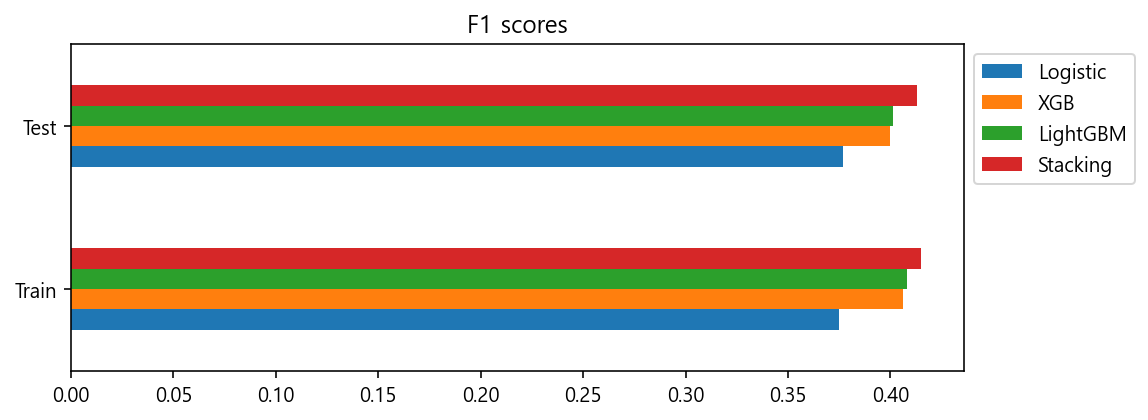

In [46]:
scores_df = pd.DataFrame(scores_dict)

_=scores_df.plot(kind='barh', figsize=(8, 3))
_=plt.title("F1 scores")
_=plt.legend(bbox_to_anchor=(1,1))

## Real-Time Predection

In [47]:
# Am I likely to get heart disease?

In [48]:
mine = pd.DataFrame({'HighBP':[0],
       'HighChol':[0],
       'CholCheck':[0],
       'BMI':[22.4],
       'Smoker':[0],
       'Stroke':[0],              
       'Diabetes':[0],
       'PhysActivity':[1],
       'Fruits':[1],
       'Veggies':[1],
       'HvyAlcoholConsump':[0],
       'AnyHealthcare':[1],
       'NoDocbcCost':[0],
       'GenHlth':[1],
       'MentHlth':[10],
       'PhysHlth':[0],
       'DiffWalk':[0],
       'Sex':[1],
       'Age':[2],
       'Education':[6],
       'Income':[1]})
mine

print('Possibility of getting heart disease: {:.2f}%'.format(voting.predict_proba(scaler.transform(mine))[:, 1][0]*100))

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,0,0,22.40,0,0,0,1,1,1,0,1,0,1,10,0,0,1,2,6,1


Possibility of getting heart disease: 2.22%


#### Hyperparameter Tuning / Feature Evaluation

In [49]:
# logistic regression coefficient

In [50]:
coefficients = pd.DataFrame(np.transpose(logistic.coef_), index=X.columns, columns=['Coefficient(Logit)'])

# Logit -> Odds
coefficients['Exp_coefficient(Odds)'] = np.exp(coefficients['Coefficient(Logit)'])

# Logit Sort by absolute size
coeff_sort = coefficients['Coefficient(Logit)'].abs().sort_values(ascending=False).keys()
coefficients.loc[coeff_sort]

,Coefficient(Logit),Exp_coefficient(Odds)
Age,0.98,2.66
GenHlth,0.63,1.87
Sex,0.42,1.53
HighChol,0.34,1.40
HighBP,0.29,1.33
Stroke,0.20,1.22
Smoker,0.20,1.22
CholCheck,0.11,1.11
DiffWalk,0.11,1.11
Income,-0.10,0.90


In [51]:
# Feature importance of XGBoost

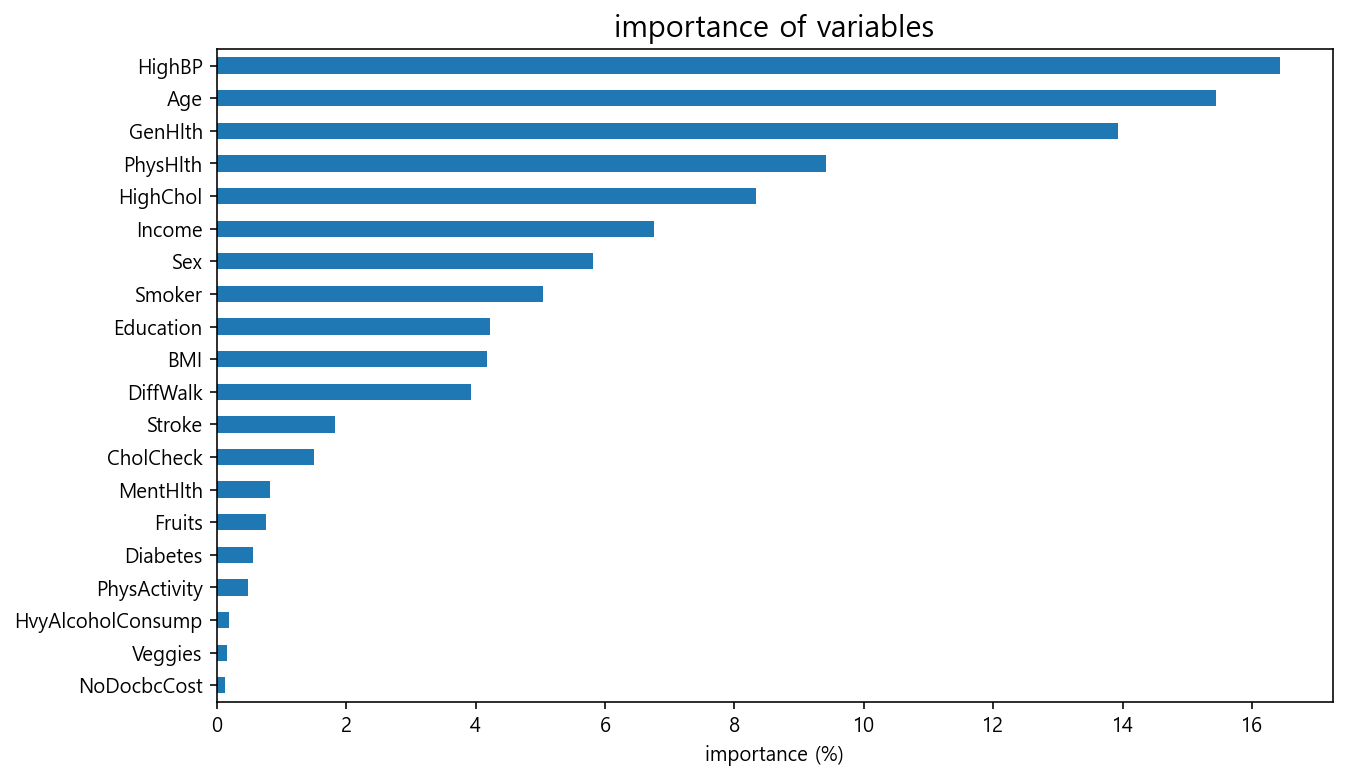

In [52]:
importance_xgb = pd.Series(xgb_best.feature_importances_*100, index=X.columns).sort_values(ascending=True)

_ = plt.figure(figsize = (10, 6))
_ = importance_xgb[-20:].plot(kind='barh')
_ = plt.title("importance of variables", fontdict={'fontsize':15})
_ = plt.xlabel('importance (%)')

In [53]:
# Visualize key variables

In [54]:
important_features = coeff_sort[:8].tolist() + importance_xgb.sort_values(ascending=False)[:8].index.tolist()
important_features = list(set(important_features))
important_features

['Income',
 'HighBP',
 'GenHlth',
 'Smoker',
 'CholCheck',
 'Age',
 'Sex',
 'PhysHlth',
 'HighChol',
 'Stroke']

### Working on the status of the patients from the dataset

In [55]:
tmp_visual = df.copy()
tmp_visual['HighChol'].replace({0:'No', 1:'Yes'}, inplace=True)
tmp_visual['HighBP'].replace({0:'No', 1:'Yes'}, inplace=True)
tmp_visual['Stroke'].replace({0:'No', 1:'Yes'}, inplace=True)
tmp_visual['Sex'].replace({0:'Female', 1:'Male'}, inplace=True)
tmp_visual['GenHlth'].replace({1:'Excellent', 2:'Very good', 3:'Good', 4:'Fair', 5:'Poor'}, inplace=True)
tmp_visual['CholCheck'].replace({0:'No', 1:'Yes'}, inplace=True)
tmp_visual['Smoker'].replace({0:'No', 1:'Yes'}, inplace=True)

In [56]:
tmp_visual['GenHlth'] = tmp_visual['GenHlth'].astype('category')
tmp_visual['GenHlth'] = tmp_visual['GenHlth'].cat.reorder_categories(['Excellent', 'Very good', 'Good', 'Fair', 'Poor'])
tmp_visual['GenHlth']

0              Poor
1              Good
2              Poor
3         Very good
4         Very good
            ...    
253675         Good
253676         Fair
253677    Excellent
253678         Good
253679    Very good
Name: GenHlth, Length: 253680, dtype: category
Categories (5, object): ['Excellent', 'Very good', 'Good', 'Fair', 'Poor']

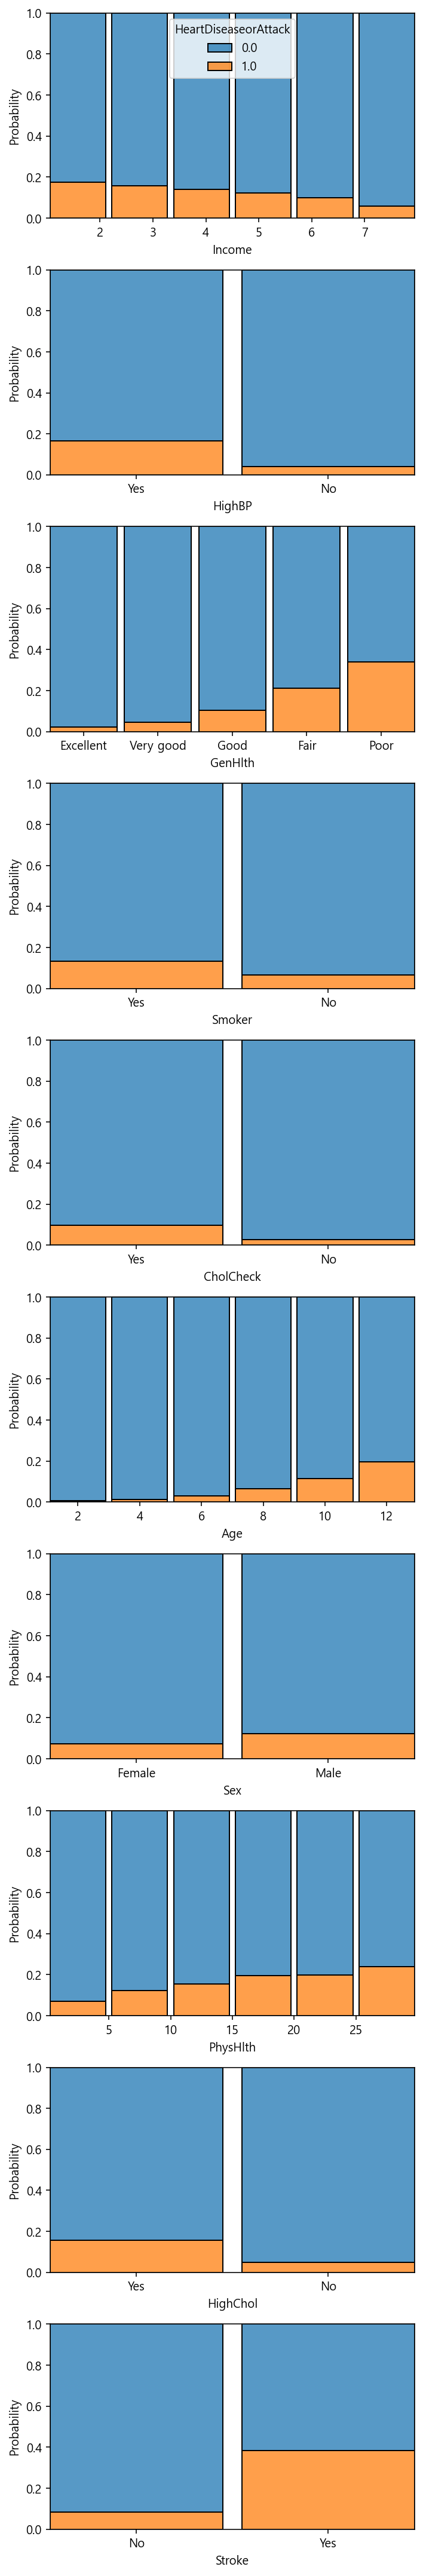

In [57]:
num_rows = len(important_features)
fig, ax = plt.subplots(num_rows, 1, figsize = (5, 3*num_rows))

for ind, col in enumerate(important_features):
    if col in num_cols:
        _ = sns.histplot(hue=target[0], x=col, data=tmp_visual, ax=ax[ind], 
                        stat='probability', multiple='fill', bins=6, shrink=0.9)
            
    else:
        _ = sns.histplot(hue=target[0], x=col, data=tmp_visual, ax=ax[ind], 
                        stat='probability', multiple='fill', shrink=0.9)
    if ind >0:
        _.get_legend().remove()
        
fig.tight_layout()